In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from methods import *
sns.set(rc = {'figure.figsize':(15,12)})


df = pd.read_csv('../data/analysis/test_2022-07-05.csv')
df['correct'] = df['y'] == df['pred']

In [14]:
n_labels = len(df['y'].unique())

In [15]:
accuracies_df = df.groupby(by=['method', 'seed']).sum()['correct'].reset_index()

test_samples = df.groupby(by=['method', 'seed']).count()['correct'].reset_index(drop=True)[0]

accuracies_df['accuracy'] = accuracies_df['correct']/test_samples

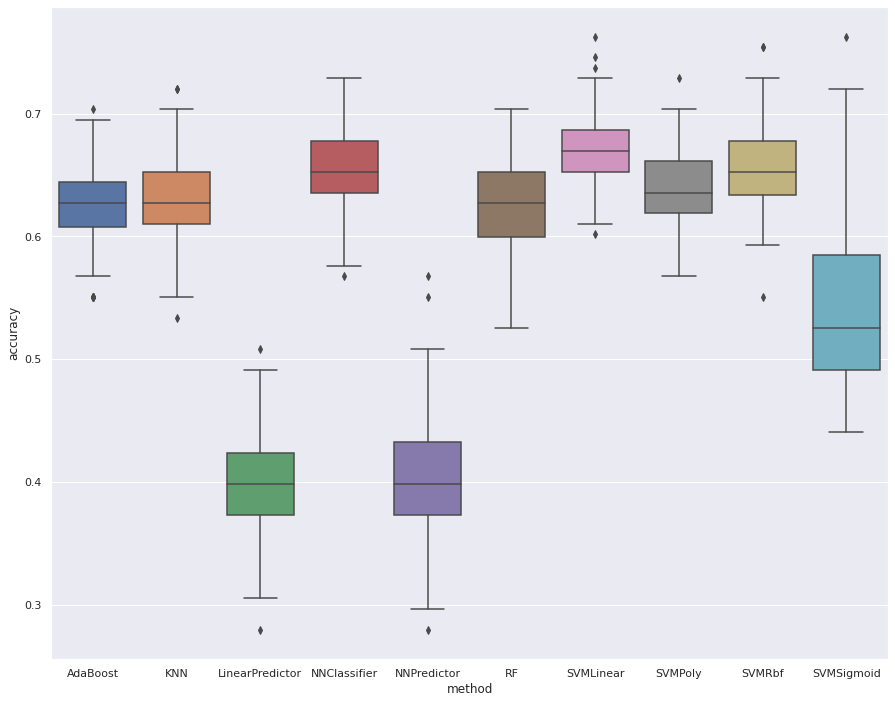

In [16]:
ax = sns.boxplot(x="method", y="accuracy", data=accuracies_df)

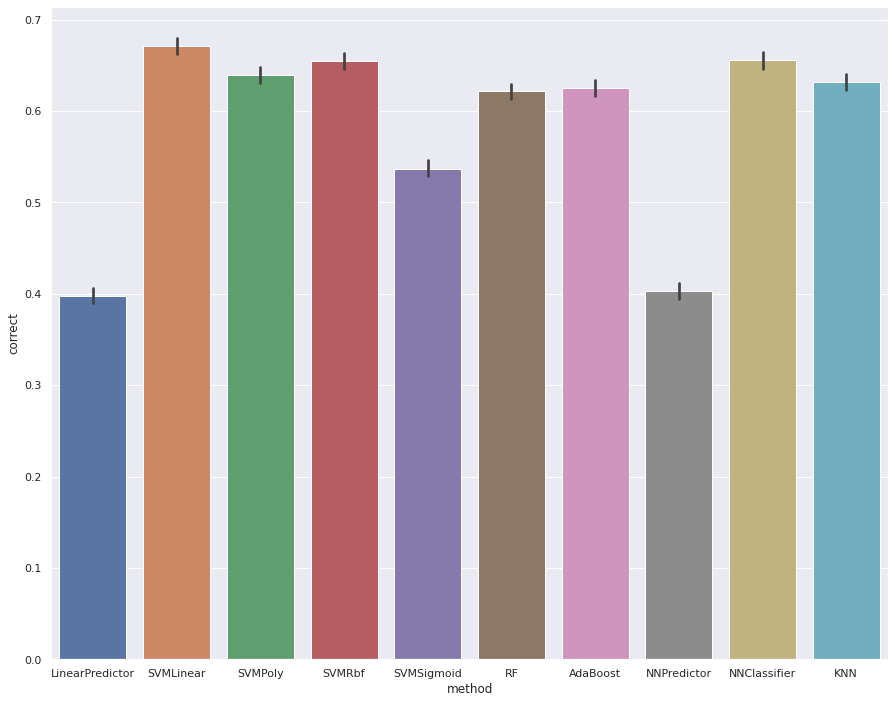

In [17]:
sns.barplot(x='method', y='correct', data=df)
plt.show()

In [18]:
df['method'].unique()

array(['LinearPredictor', 'SVMLinear', 'SVMPoly', 'SVMRbf', 'SVMSigmoid',
       'RF', 'AdaBoost', 'NNPredictor', 'NNClassifier', 'KNN'],
      dtype=object)

LinearPredictor


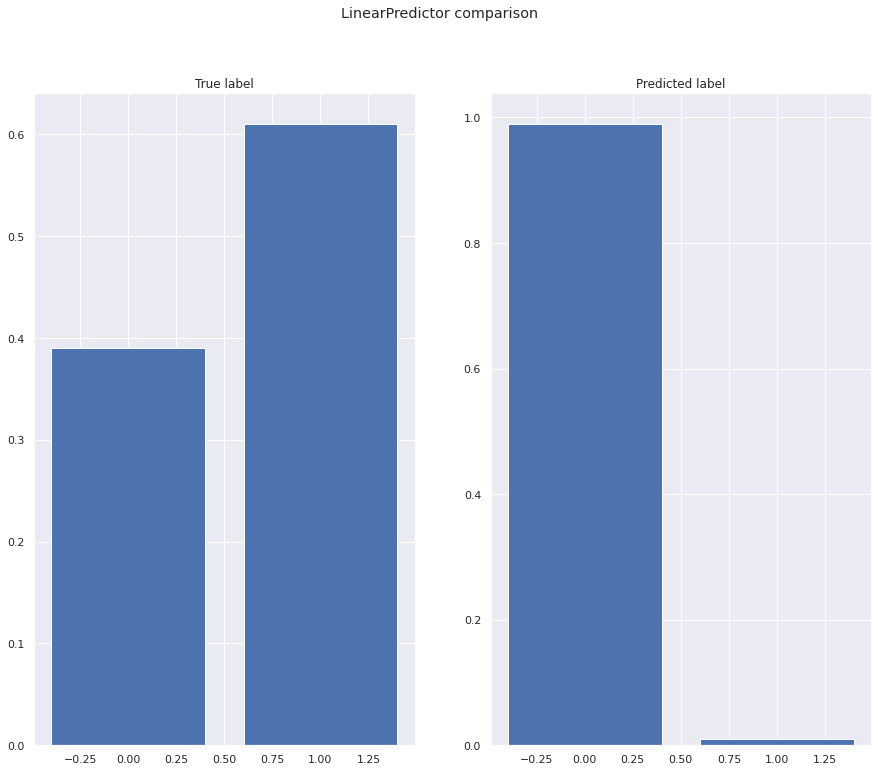

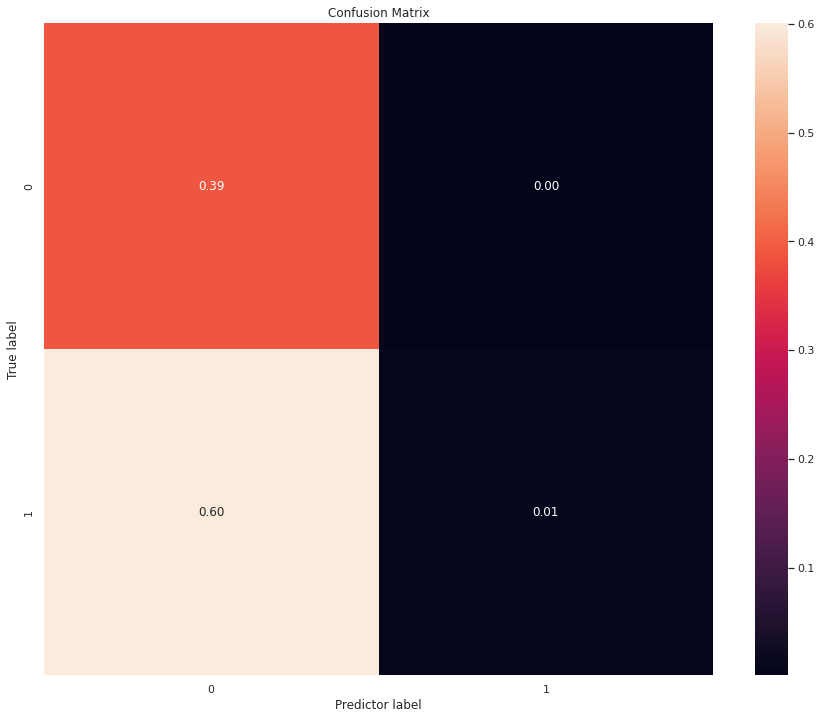

 Accuracy: 0.39796610169491525
 Comfort acc: 0.9967398391653988
 Uncomfort acc: 0.015279899986109182


SVMLinear


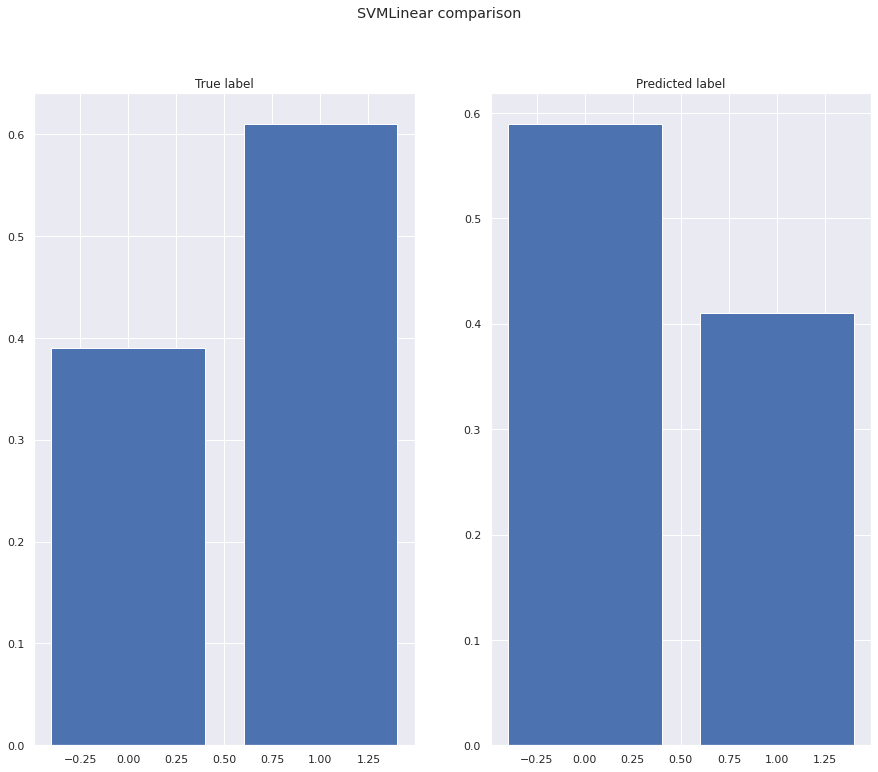

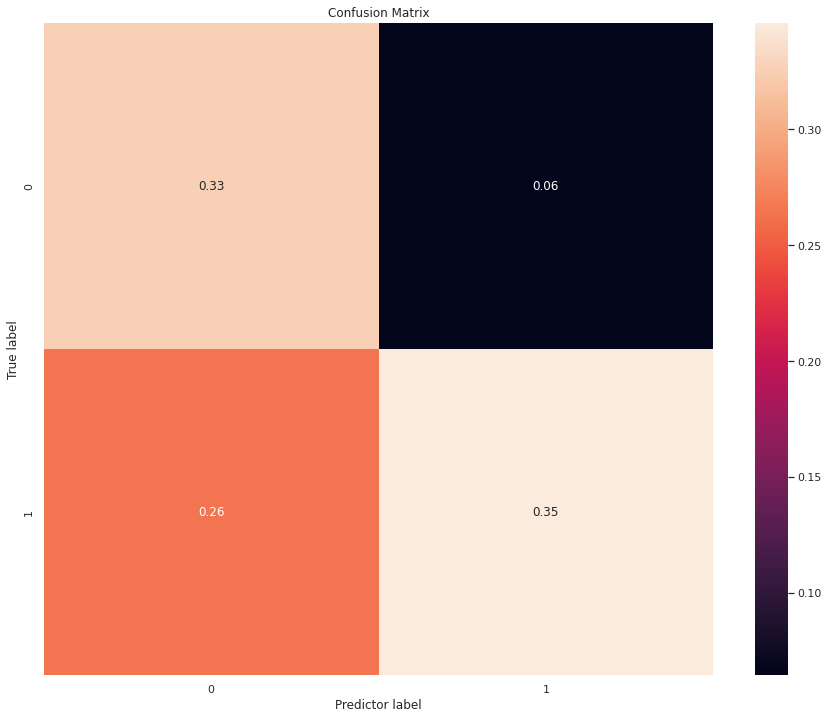

 Accuracy: 0.671271186440678
 Comfort acc: 0.8343838296022604
 Uncomfort acc: 0.5670231976663425


SVMPoly


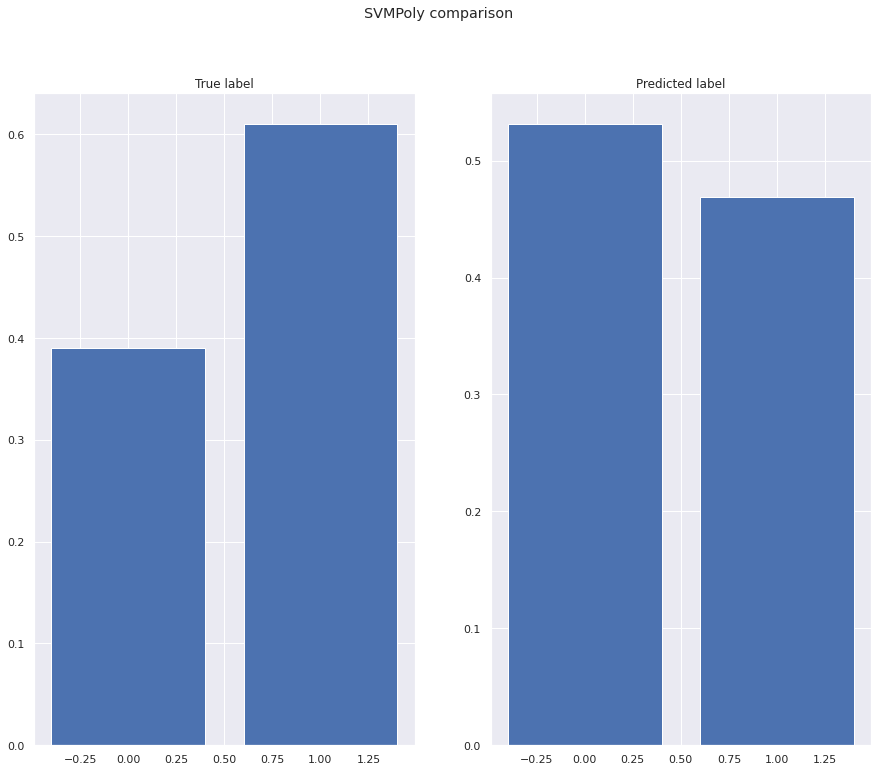

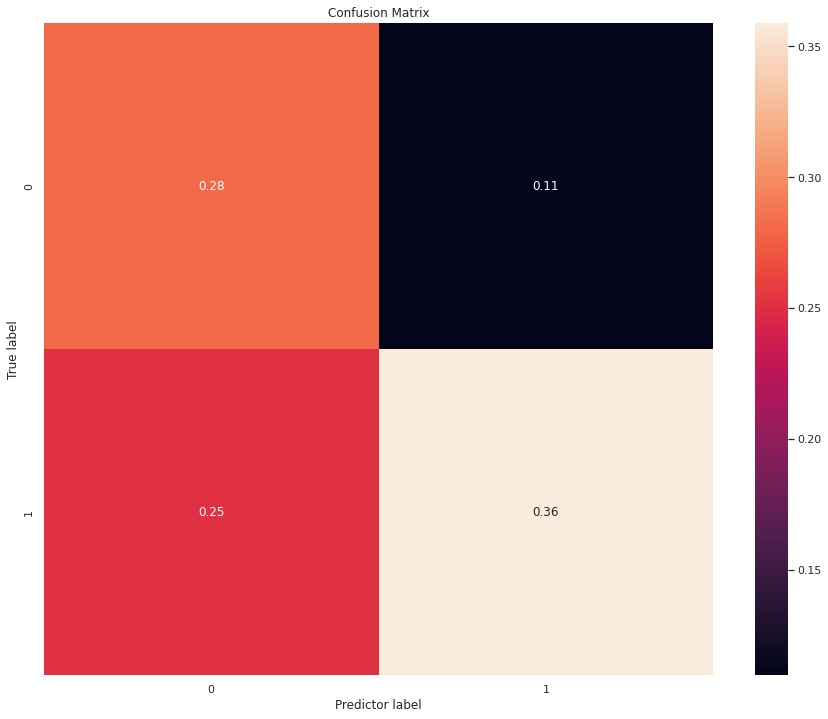

 Accuracy: 0.6391525423728814
 Comfort acc: 0.7185394479460987
 Uncomfort acc: 0.5884150576468954


SVMRbf


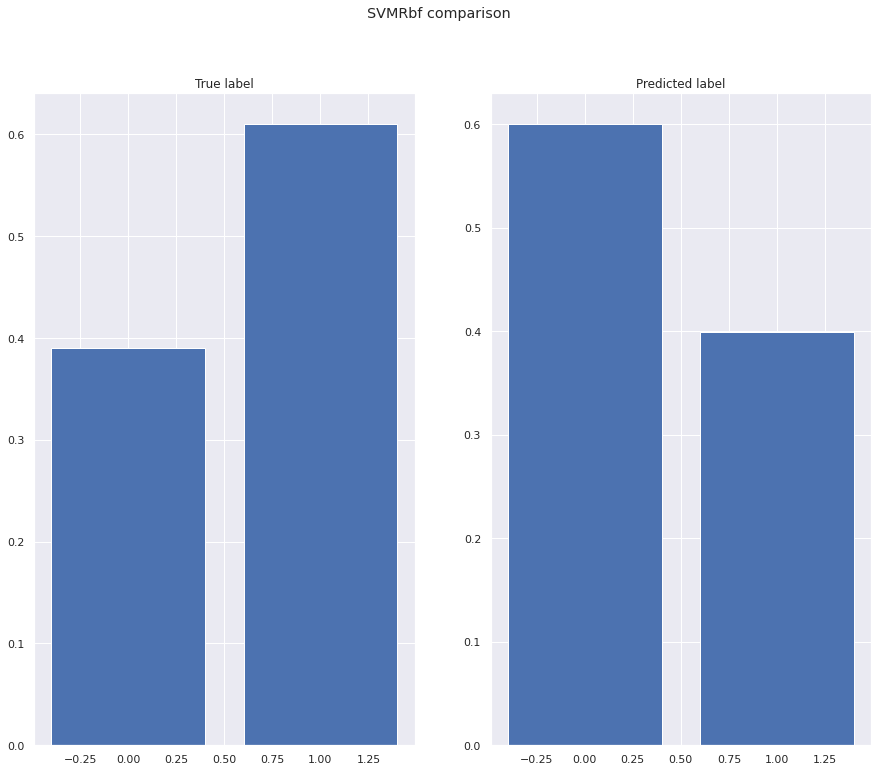

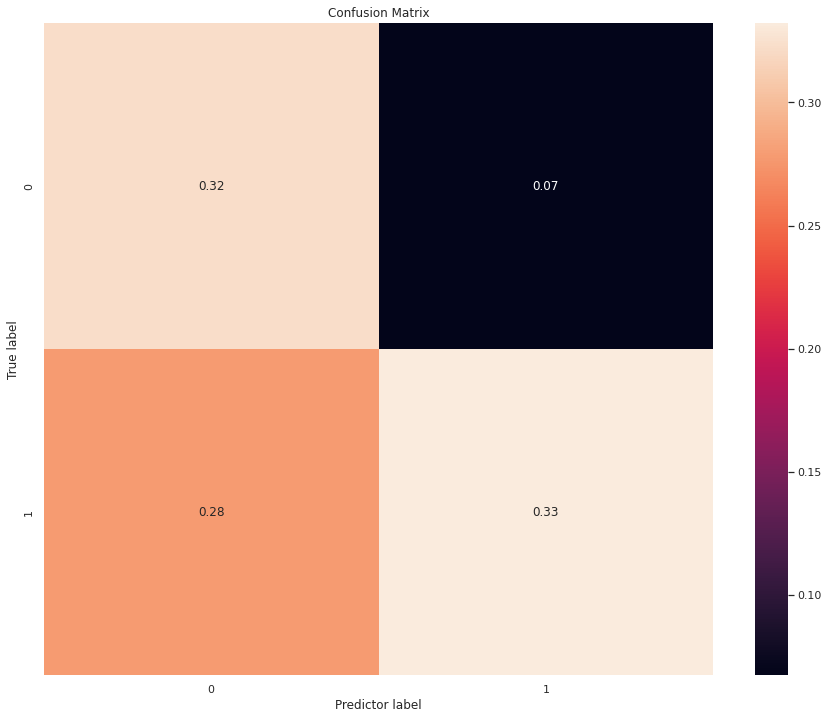

 Accuracy: 0.6546610169491525
 Comfort acc: 0.8269941317104977
 Uncomfort acc: 0.5445200722322544


SVMSigmoid


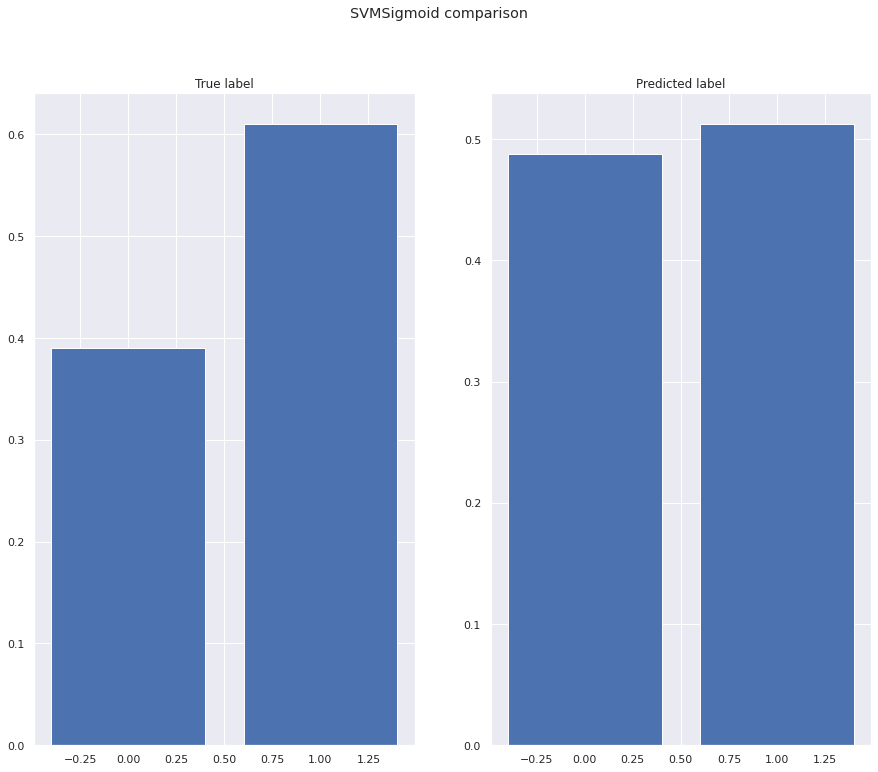

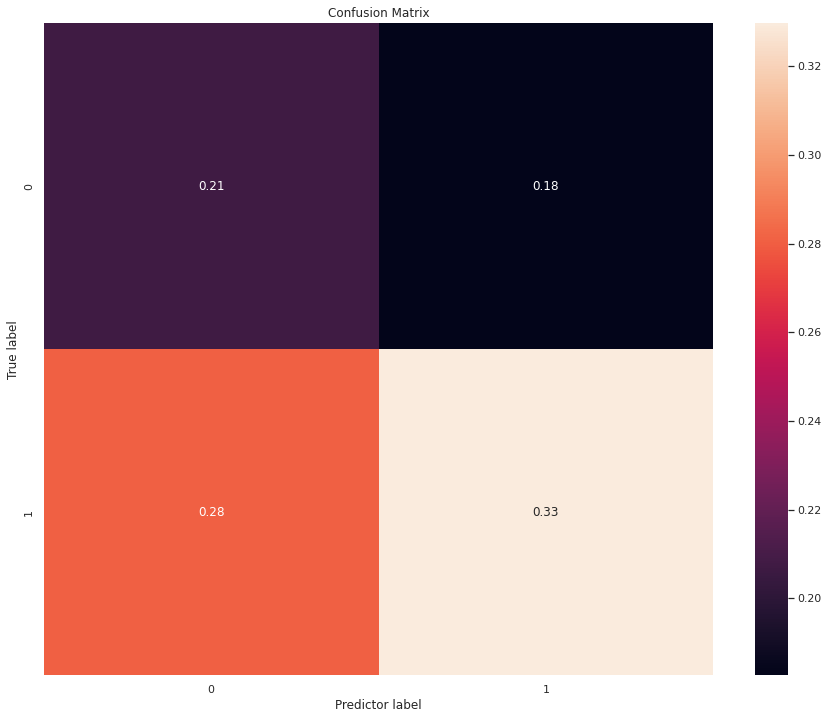

 Accuracy: 0.5370338983050847
 Comfort acc: 0.5316235600956314
 Uncomfort acc: 0.5404917349631893


RF


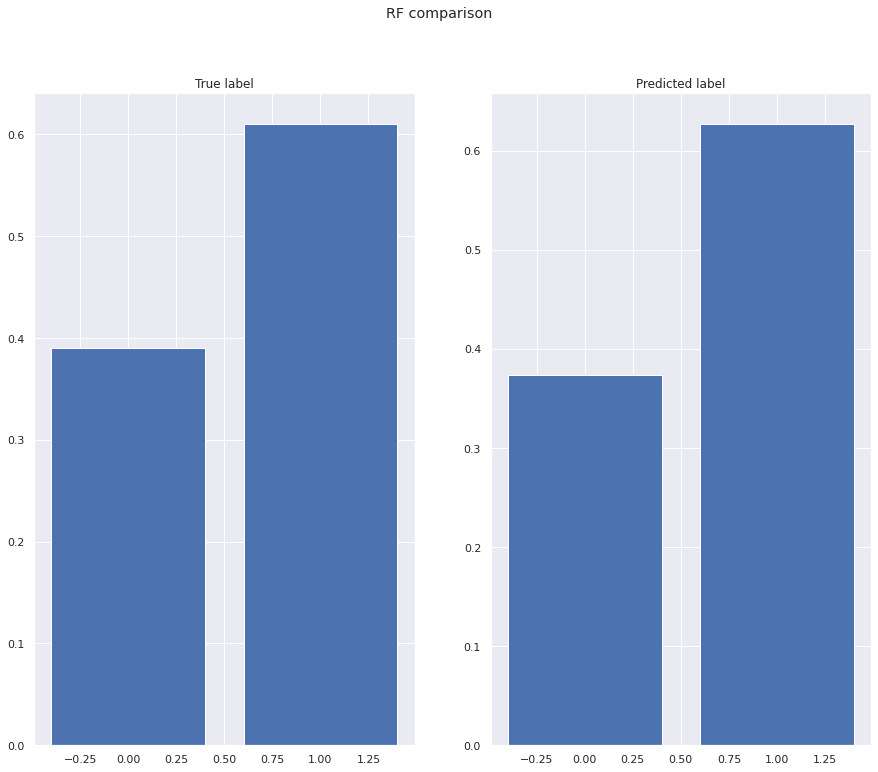

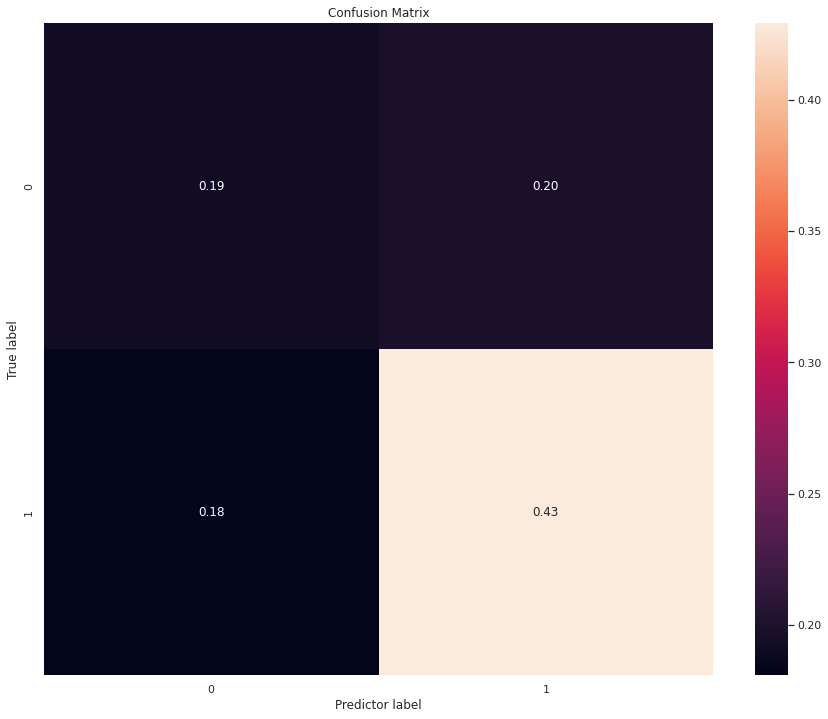

 Accuracy: 0.6215254237288136
 Comfort acc: 0.4933710063029776
 Uncomfort acc: 0.70343103208779


AdaBoost


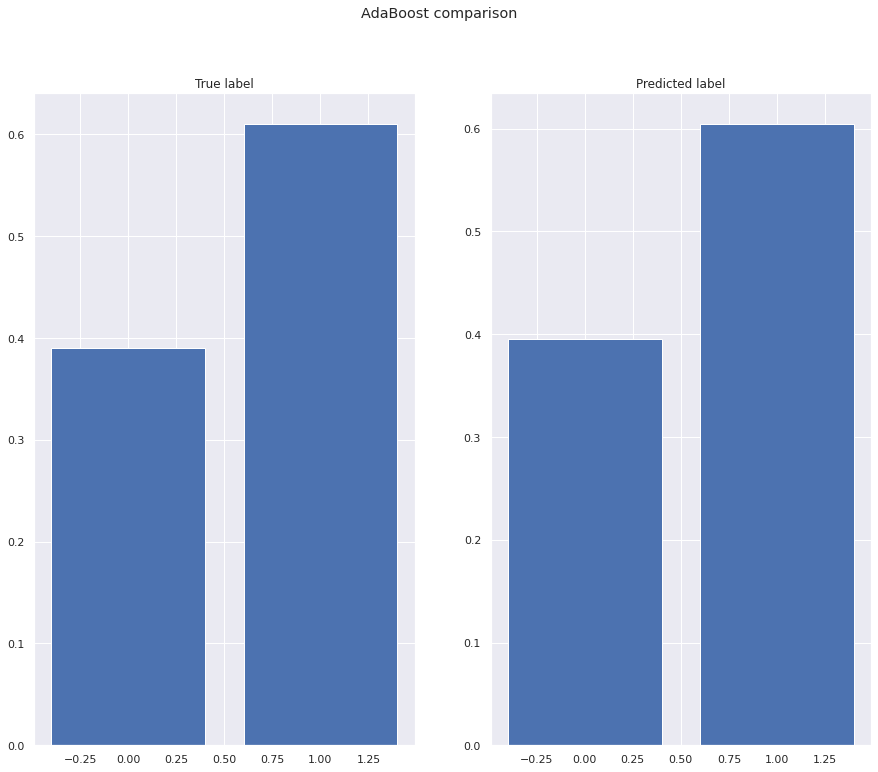

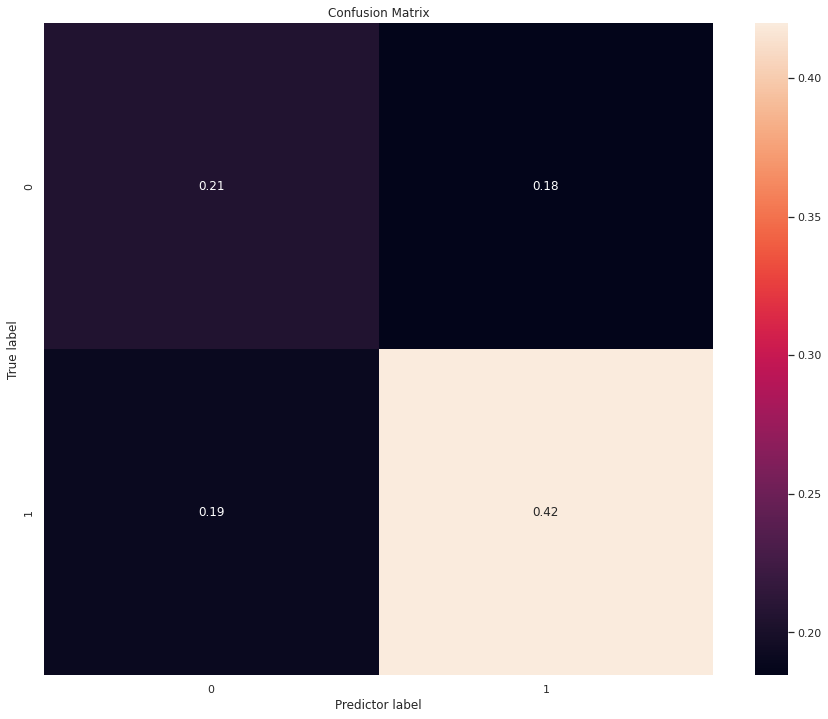

 Accuracy: 0.6253389830508475
 Comfort acc: 0.5268419908715497
 Uncomfort acc: 0.6882900402833727


NNPredictor


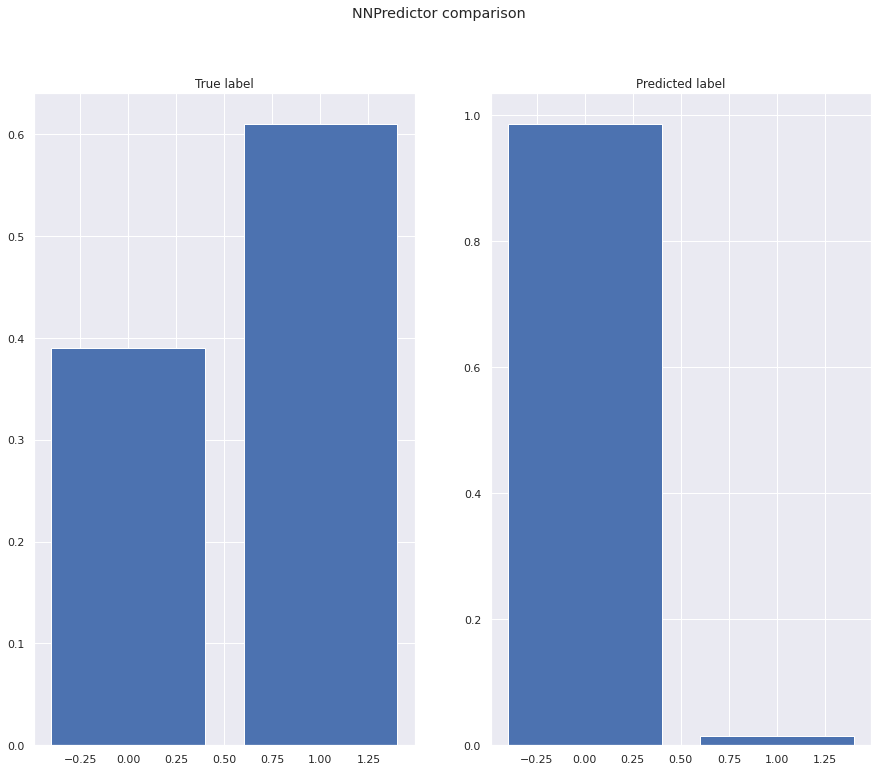

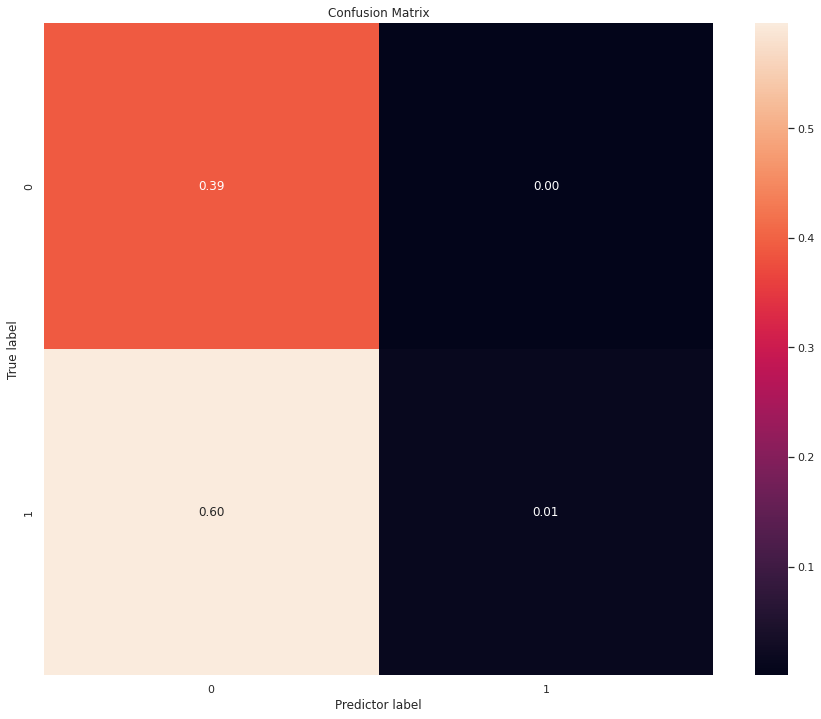

 Accuracy: 0.4030508474576271
 Comfort acc: 0.9982612475548794
 Uncomfort acc: 0.02264203361577997


NNClassifier


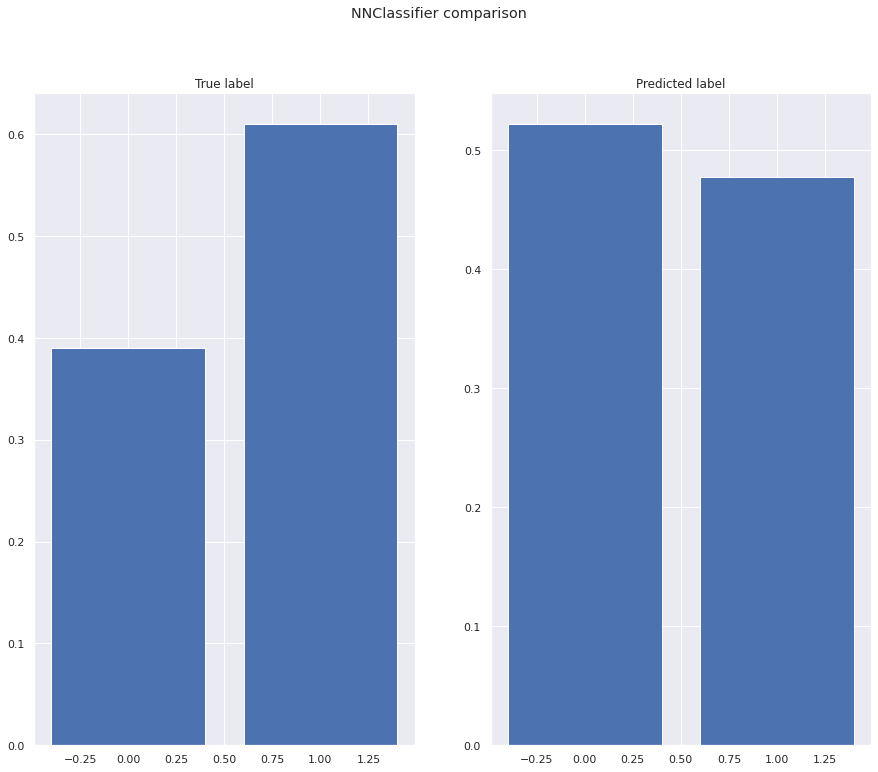

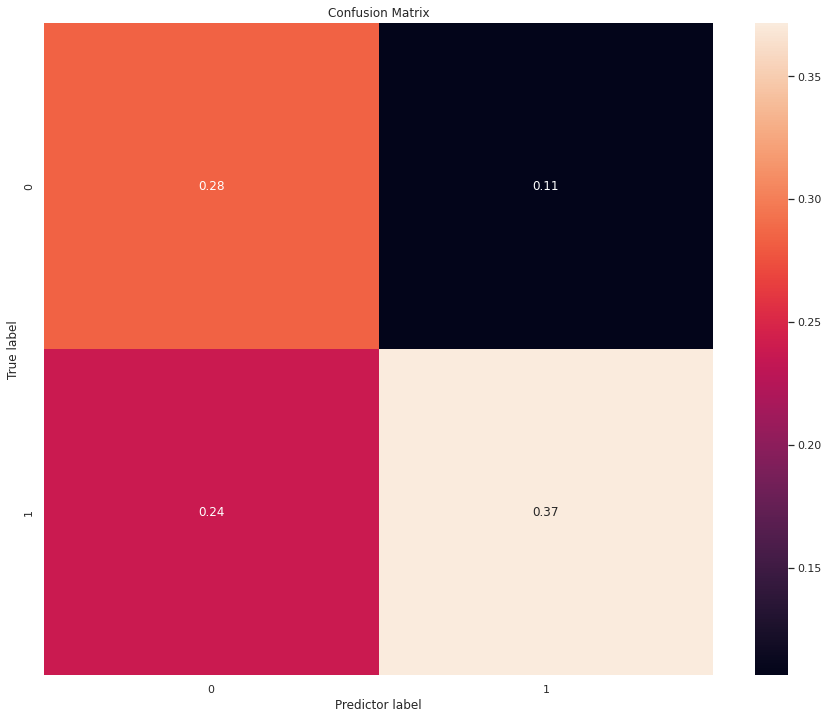

 Accuracy: 0.6554237288135594
 Comfort acc: 0.727667898282982
 Uncomfort acc: 0.6092512849006807


KNN


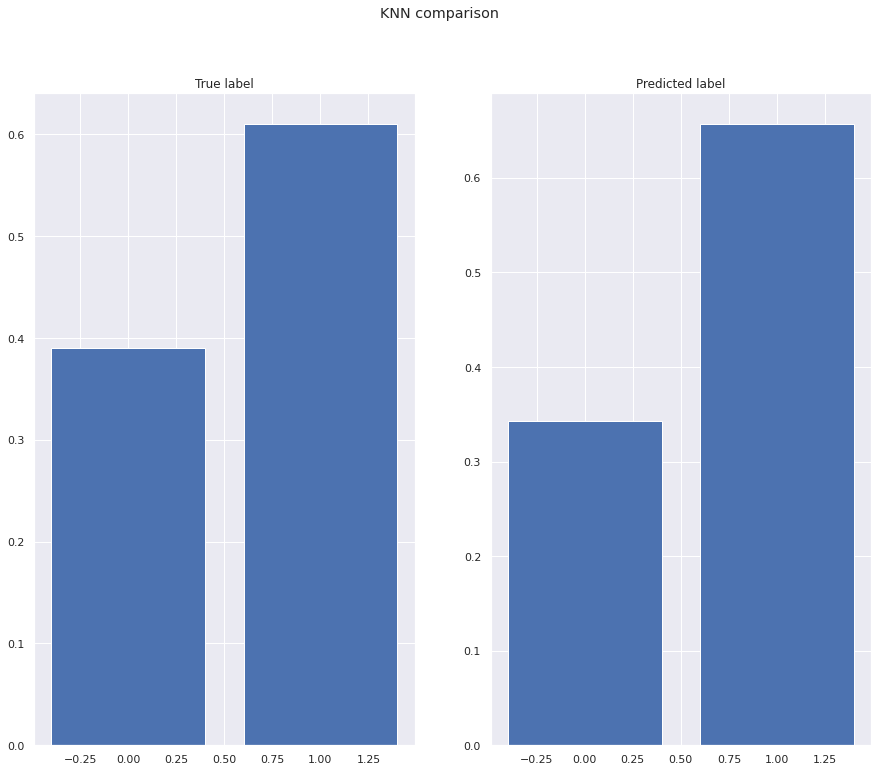

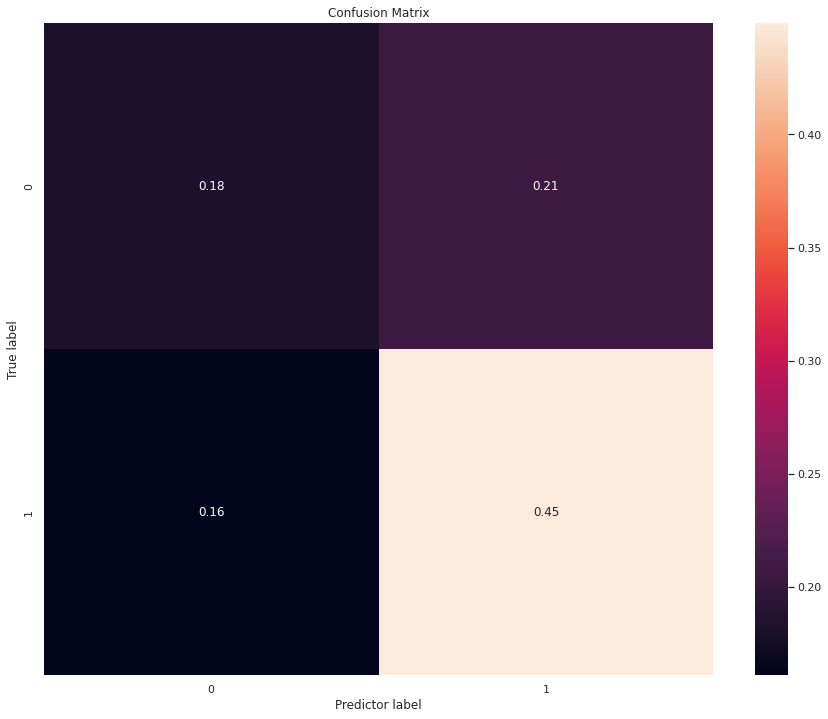

 Accuracy: 0.6316949152542373
 Comfort acc: 0.46772440773744844
 Uncomfort acc: 0.7364911793304626




In [19]:
for method in df['method'].unique():
    print(method)

    method_df = df[df['method'] == method]

    cm = confusion_matrix(method_df['y'], method_df['pred'])
    cm = cm/cm.sum()

    fig, axs = plt.subplots(1,2)
    fig.suptitle(f'{method} comparison')
    axs[0].bar([i for i in range(n_labels)], cm.sum(axis=1))
    axs[0].title.set_text('True label')
    axs[1].bar([i for i in range(n_labels)], cm.sum(axis=0))
    axs[1].title.set_text('Predicted label')
    plt.show()

    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title('Confusion Matrix')
    plt.xlabel('Predictor label')
    plt.ylabel('True label')
    plt.show()



    comfort_acc, uncomfort_acc = cm.diagonal()/cm.sum(axis=1)
    print(f' Accuracy: {np.trace(cm)}\n Comfort acc: {comfort_acc}\n Uncomfort acc: {uncomfort_acc}\n\n')